In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Inserciones

In [22]:
df_id = pd.read_csv("inserciones_id.csv")
df_usr = pd.read_csv("inserciones_username.csv")
print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.525936  1.084530  1.640103  2.130501   
1      hashing_cerrado_lineal  0.405004  0.820600  1.255061  1.642042   
2  hashing_cerrado_cuadratico  0.385805  0.797481  1.220457  1.612694   
3       hashing_cerrado_doble  0.396215  0.812257  1.249468  1.658901   
4                         stl  0.410278  0.818869  1.280897  1.623316   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  2.671326  3.204045  3.735942  4.287095  4.812268  ...  5.974012  6.541079   
1  2.053790  2.481719  2.881701  3.304925  3.688095  ...  4.501450  4.870017   
2  2.015493  2.464183  2.857826  3.262527  3.618417  ...  4.423538  4.821741   
3  2.081956  2.555395  2.945048  3.367549  3.730922  ...  4.576580  4.993173   
4  1.990407  2.602125  2.966246  3.341467  3.676496  ...  4.937852  5.299133   

      13000     14000     15000     16000     17000     18000      19000  \
0  7

In [23]:
df_id_melted = df_id.melt(id_vars='mapa', var_name='inserciones', value_name='tiempo')
df_usr_melted = df_usr.melt(id_vars='mapa', var_name='inserciones', value_name='tiempo')

df_id_melted['inserciones'] = df_id_melted['inserciones'].astype(int)
df_usr_melted['inserciones'] = df_usr_melted['inserciones'].astype(int)

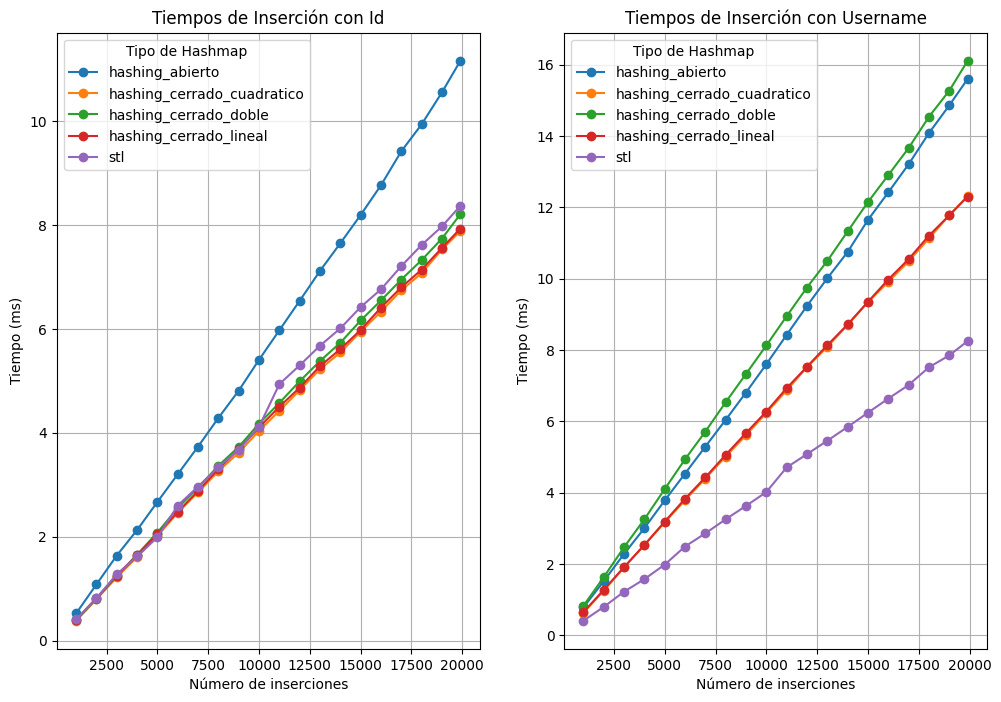

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].plot(grp["inserciones"], grp["tiempo"], marker='o', label=key[0])
    
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].plot(grp["inserciones"], grp["tiempo"], marker='o', label=key[0])

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de inserciones")

axes[0].set(title="Tiempos de Inserción con Id")
axes[1].set(title="Tiempos de Inserción con Username")

plt.savefig("inserciones.png", bbox_inches="tight")
plt.show()


# Busquedas Tipo 1

In [25]:
df_id = pd.read_csv("busquedas1_id.csv")
df_usr = pd.read_csv("busquedas1_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.195623  0.370312  0.560405  0.760013   
1      hashing_cerrado_lineal  0.059491  0.109397  0.163755  0.217789   
2  hashing_cerrado_cuadratico  0.060378  0.109522  0.165142  0.219657   
3       hashing_cerrado_doble  0.072453  0.133613  0.200839  0.265632   
4                         stl  0.163210  0.308937  0.458918  0.607362   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  1.012615  1.189810  1.420514  1.706997  1.971778  ...  2.516634  2.827680   
1  0.279519  0.327471  0.382946  0.445075  0.495100  ...  0.615010  0.667325   
2  0.277971  0.328772  0.381043  0.443623  0.498805  ...  0.611370  0.682817   
3  0.336973  0.396228  0.461849  0.531003  0.601290  ...  0.735978  0.816872   
4  0.806582  0.925552  1.096729  1.326884  1.520918  ...  1.918765  2.188654   

      13000     14000     15000     16000     17000     18000     19000  \
0  3.

In [26]:
df_id_melted = df_id.melt(id_vars='mapa', var_name='nbusquedas', value_name='tiempo')
df_usr_melted = df_usr.melt(id_vars='mapa', var_name='nbusquedas', value_name='tiempo')

print(df_id_melted.head())

df_id_melted['nbusquedas'] = df_id_melted['nbusquedas'].astype(int)
df_usr_melted['nbusquedas'] = df_usr_melted['nbusquedas'].astype(int)

                         mapa nbusquedas    tiempo
0             hashing_abierto       1000  0.195623
1      hashing_cerrado_lineal       1000  0.059491
2  hashing_cerrado_cuadratico       1000  0.060378
3       hashing_cerrado_doble       1000  0.072453
4                         stl       1000  0.163210


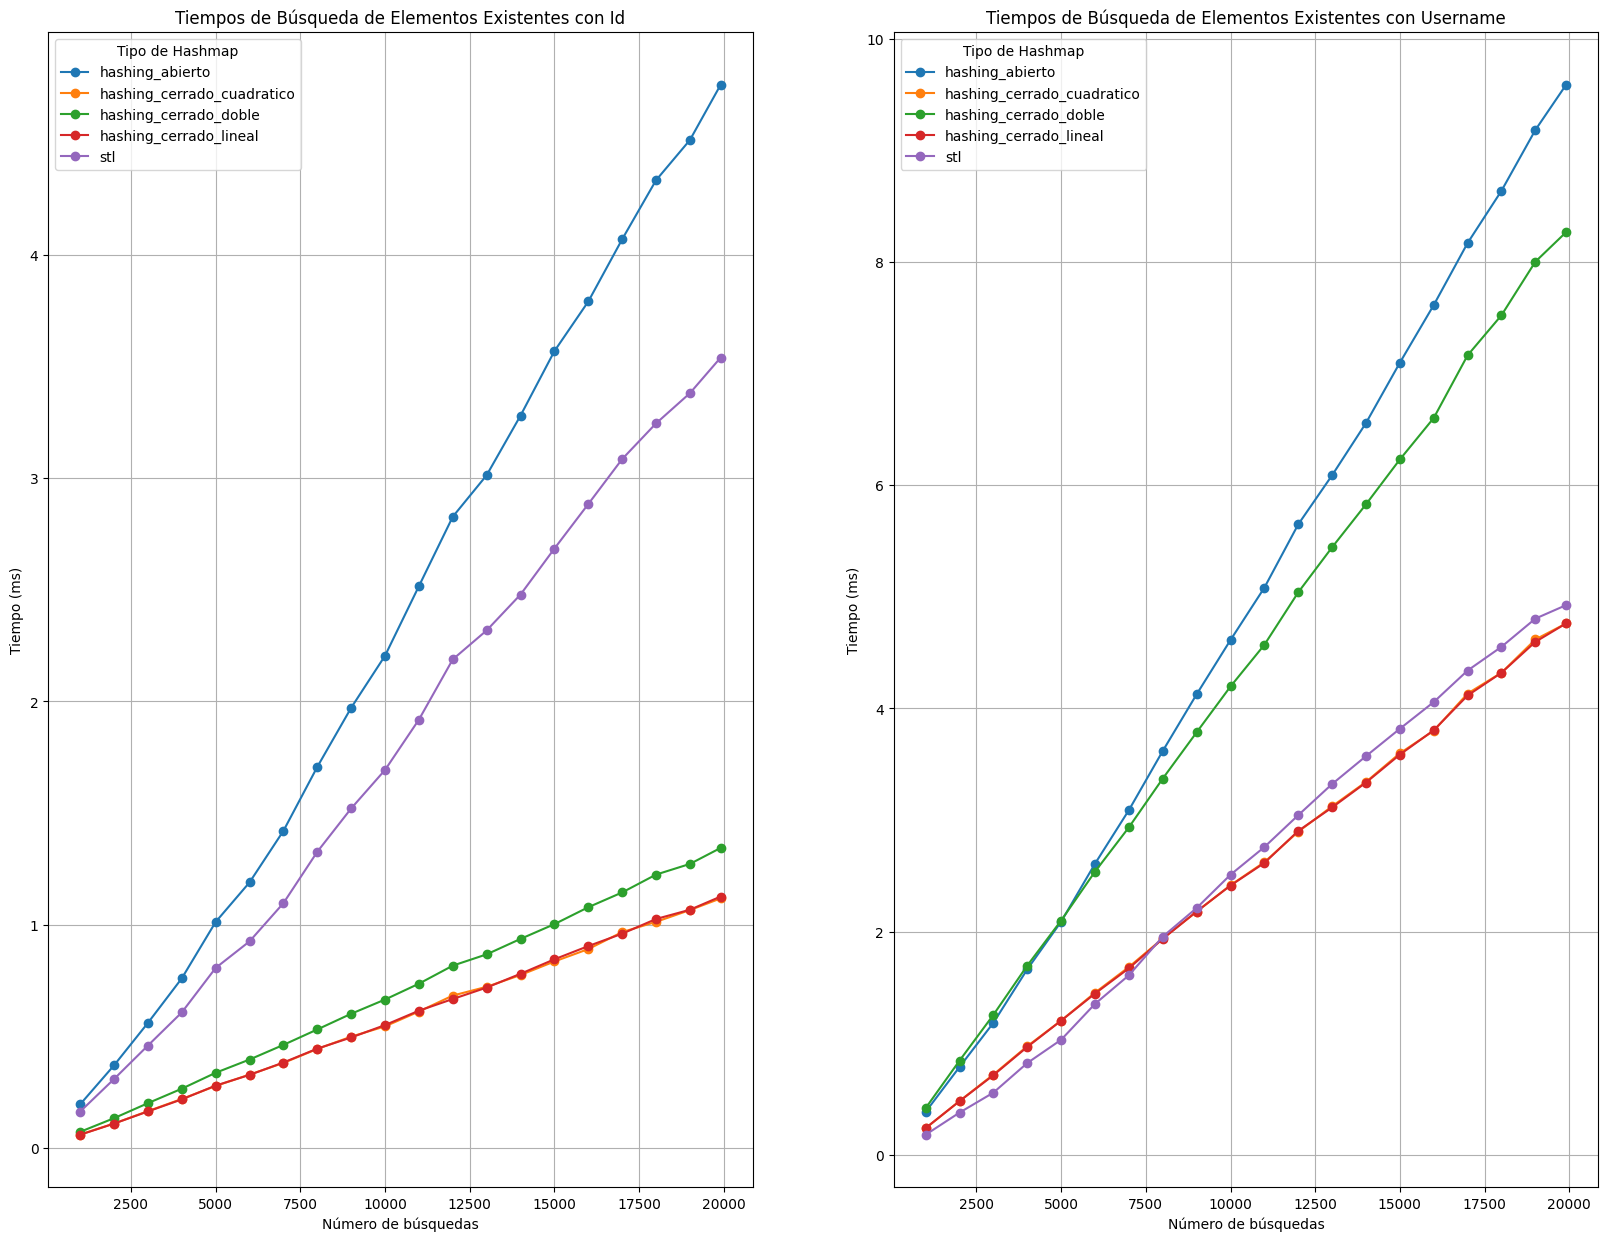

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,15))

for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].plot(grp["nbusquedas"], grp["tiempo"], marker='o', label=key[0])
    
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].plot(grp["nbusquedas"], grp["tiempo"], marker='o', label=key[0])

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de búsquedas")

axes[0].set(title="Tiempos de Búsqueda de Elementos Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos Existentes con Username")

plt.savefig("busquedas_1.png", bbox_inches="tight")
plt.show()

# Busquedas Tipo 2

In [28]:
df_id = pd.read_csv("busquedas2_id.csv")
df_usr = pd.read_csv("busquedas2_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.092209  0.184603  0.246544  0.330818   
1      hashing_cerrado_lineal  0.059992  0.118714  0.166673  0.224256   
2  hashing_cerrado_cuadratico  0.059771  0.121534  0.168641  0.224168   
3       hashing_cerrado_doble  0.073300  0.145631  0.203874  0.272511   
4                         stl  0.151718  0.306951  0.422000  0.555653   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  0.417594  0.506627  0.568360  0.677779  0.752528  ...  0.920725  0.999362   
1  0.273823  0.335042  0.375148  0.435345  0.487361  ...  0.599426  0.647776   
2  0.275511  0.336405  0.381079  0.441403  0.492393  ...  0.603616  0.643837   
3  0.339826  0.407035  0.457756  0.534986  0.599381  ...  0.733305  0.786900   
4  0.685078  0.841772  0.940217  1.114355  1.242178  ...  1.514233  1.630565   

      13000     14000     15000     16000     17000     18000     19000  \
0  1.

In [29]:
df_id_melted = df_id.melt(id_vars='mapa', var_name='busquedas', value_name='tiempo')
df_usr_melted = df_usr.melt(id_vars='mapa', var_name='busquedas', value_name='tiempo')

df_id_melted['busquedas'] = df_id_melted['busquedas'].astype(int)
df_usr_melted['busquedas'] = df_usr_melted['busquedas'].astype(int)

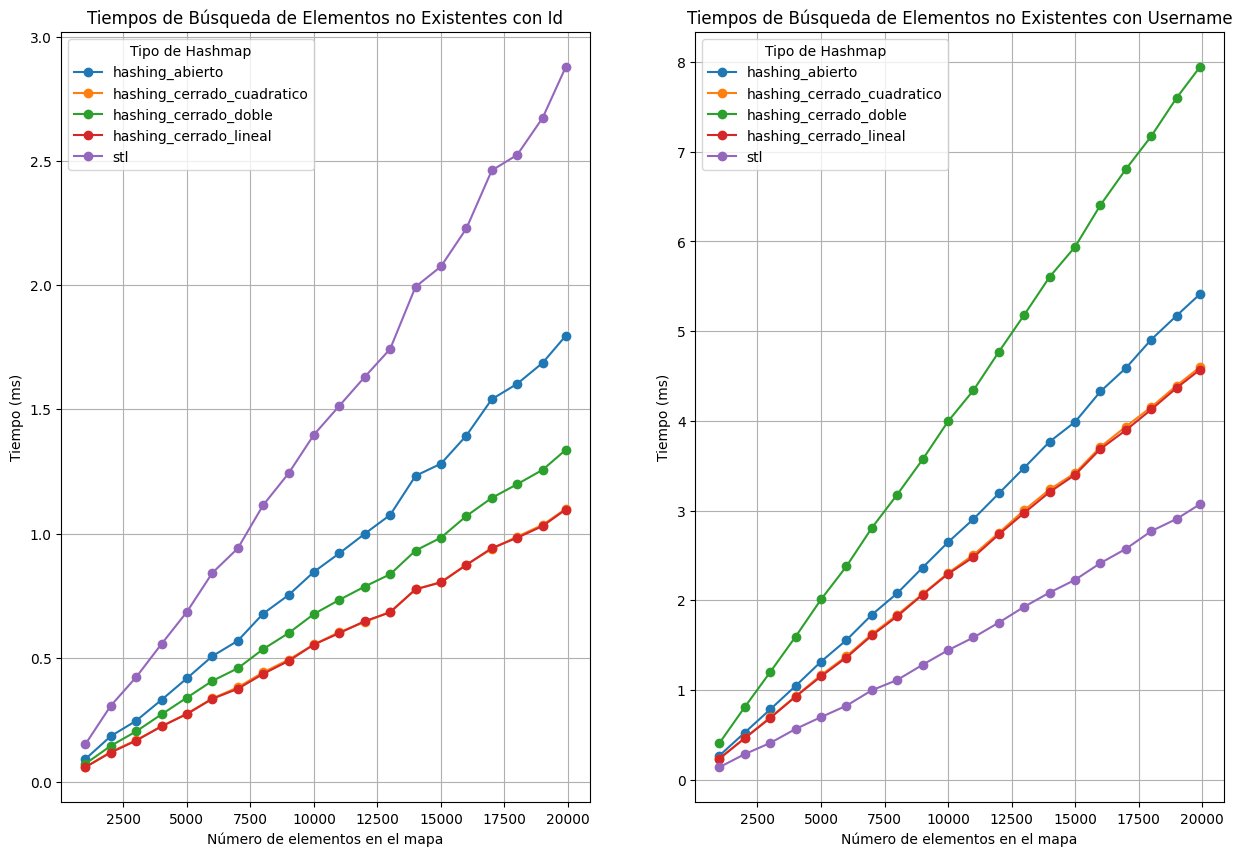

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].plot(grp["busquedas"], grp["tiempo"], marker='o', label=key[0])
    
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].plot(grp["busquedas"], grp["tiempo"], marker='o', label=key[0])

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de elementos en el mapa")

axes[0].set(title="Tiempos de Búsqueda de Elementos no Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos no Existentes con Username")

plt.savefig("busquedas_2.png", bbox_inches="tight")
plt.show()